In [51]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import time
import tabletext

COLUMN_NEED_CAL = [5,6,7]
# hàm đọc file và lấy ra cột dữ liệu cần
def read_file(path): 
    
    data = pd.read_csv(path).values  
    y =  data[:, 1].reshape(-1,1)
    confirmed_col =  data[:, 5].reshape(-1,1)
    dead_col = data[:, 6].reshape(-1,1)
    recover_col = data[:, 7].reshape(-1,1)
    datas = dict()
    for index in range(len(y)):  
        value = y[index][0]
        if value not in datas:
            datas[value] = (confirmed_col[index][0], recover_col[index][0], dead_col[index][0])
        else:
            confirm, recover, dead = datas[value]
            confirm += confirmed_col[index][0]
            recover += recover_col[index][0]
            dead += dead_col[index][0]
            datas[value] = (confirm, recover, dead)
            
    for key, value in datas.items():
        print(key, value)
    return datas
  
if __name__ == '__main__':
    # đọc dữ liệu tập train lấy ra cột mong muốn để train 
    # ngày khảo sát: (người nhiễm, người khỏi bệnh, người chết)
    data = read_file('covid_19_data.csv')  

01/22/2020 (555.0, 28.0, 17.0)
01/23/2020 (653.0, 30.0, 18.0)
01/24/2020 (941.0, 36.0, 26.0)
01/25/2020 (1438.0, 39.0, 42.0)
01/26/2020 (2118.0, 52.0, 56.0)
01/27/2020 (2927.0, 61.0, 82.0)
01/28/2020 (5578.0, 107.0, 131.0)
01/29/2020 (6165.0, 126.0, 133.0)
01/30/2020 (8235.0, 143.0, 171.0)
01/31/2020 (9925.0, 222.0, 213.0)
02/01/2020 (12038.0, 284.0, 259.0)
02/02/2020 (16787.0, 472.0, 362.0)
02/03/2020 (19881.0, 623.0, 426.0)
02/04/2020 (23892.0, 852.0, 492.0)
02/05/2020 (27636.0, 1124.0, 564.0)
02/06/2020 (30818.0, 1487.0, 634.0)
02/07/2020 (34392.0, 2011.0, 719.0)
02/08/2020 (37121.0, 2616.0, 806.0)
02/09/2020 (40151.0, 3244.0, 906.0)
02/10/2020 (42763.0, 3946.0, 1013.0)
02/11/2020 (44803.0, 4683.0, 1113.0)
02/12/2020 (45222.0, 5150.0, 1118.0)
02/13/2020 (60370.0, 6295.0, 1371.0)
02/14/2020 (66887.0, 8058.0, 1523.0)
02/15/2020 (69032.0, 9395.0, 1666.0)
02/16/2020 (71226.0, 10865.0, 1770.0)
02/17/2020 (73260.0, 12583.0, 1868.0)
02/18/2020 (75138.0, 14352.0, 2007.0)
02/19/2020 (75641.0

In [134]:
from sklearn import preprocessing
# lấy tất cả cách ngày chuyển sang số 


def handle_data(data):
    mlb = LabelEncoder().fit(list(data.keys()))
    print('Tổng số ngày trong khảo sát là',len(mlb.classes_),'ngày\n',mlb.classes_)
    num_day = mlb.transform(list(data.keys()))
    confirm = []
    recover = []
    dead = []
    for key, item in data.items(): 
        confirm.append(item[0])
        recover.append(item[1])
        dead.append(item[2]) 
    show(num_day,confirm,'r',xlabel='day',ylabel='comfirmed')
    tablle(mlb.classes_,confirm)
      
    fig, axs = plt.subplots(1, 3, figsize=(27, 9), sharey=True)
    axs[0].scatter(num_day, confirm,color='r') 
    axs[1].bar(num_day, recover,color='green')
    axs[2].bar(num_day, dead,color='black')
    fig.suptitle('nCov 19 People')
    
    X = np.hstack((np.ones((len(num_day), 1)), np.array(num_day,dtype=float).reshape(-1,1)))  
    y = np.array(confirm,dtype=int).reshape(-1, 1)  
    return X, y
#     show(num_day,recover,'g',xlabel='day',ylabel='covered')
#     show(num_day,dead,'black',xlabel='day',ylabel='dead')
    
def show(x,y,color,xlabel,ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(x,y,c=color)
    plt.show()
     
def tablle(x,y): 
    data = dict()  
    data['date'] = x
    data['people confirmed'] = y
    df = pd.DataFrame(data)
    
    
    print(df.head(10))



In [135]:

class LinearModel():
    
    def __init__(self, X=None, y=None, normalize=True):
        self.X_init = np.array(X)
        self.y_init = np.array(y)
        self.X = X
        self.y = y
        self.size = X.shape[-1]
        self.weight = np.zeros(X.shape[-1]).reshape(-1,1)
        self.mean = np.mean(self.X[:, 1:], axis=0)
        self.std = np.std(self.X[:, 1:], axis=0) 
        if normalize:
            self.feature_normalization() 
        
    # chuẩn hoá về khoảng [-1,1]
    def feature_normalization(self):      
        self.X[:, 1:] = (self.X[:, 1:] - np.mean(self.X[:, 1:], axis=0)) / np.std(self.X[:, 1:], axis=0) 

    def forward(self): 
        return np.dot(self.X, self.weight)
    
    def loss(self):
        return np.sum(((self.forward() - self.y)**2)/ (self.size)*2)
    
    def derative_w0(self):
        return np.sum(self.forward() - self.y)
    
    def derative_w1(self): 
        return np.sum(np.multiply((self.forward() - self.y), self.X[:,1].reshape(-1,1)))
    
    def gradient_descend(self): 
        old_loss = 0
        count = 0
        while True: 
            count+=1
            self.weight[0] =  self.weight[0] - 0.01 * self.derative_w0() 
            self.weight[1] =  self.weight[1] - 0.01 * self.derative_w1() 
            new_loss = self.loss() 
            if abs(new_loss - old_loss) < 10e+5: 
                break 
            old_loss = new_loss 
            print(new_loss)

        print("Final loss is:",old_loss)  
        for index in range(len(X[:,1])):
            if index == 0:
                break
            plt.scatter(X[:,index],y.T[0])
        plt.show()
    
    def predict(self):  
        y_pred = np.dot(X, self.weight)
        return y_pred  
    
    def predict_by_day(self, day):  
        day = np.array(day,dtype=float) 
        day[:,1:] = (day[:,1:]-self.mean) / self.std 
        y_pred = np.dot(day, self.weight)
        return y_pred  

Tổng số ngày trong khảo sát là 46 ngày
 ['01/22/2020' '01/23/2020' '01/24/2020' '01/25/2020' '01/26/2020'
 '01/27/2020' '01/28/2020' '01/29/2020' '01/30/2020' '01/31/2020'
 '02/01/2020' '02/02/2020' '02/03/2020' '02/04/2020' '02/05/2020'
 '02/06/2020' '02/07/2020' '02/08/2020' '02/09/2020' '02/10/2020'
 '02/11/2020' '02/12/2020' '02/13/2020' '02/14/2020' '02/15/2020'
 '02/16/2020' '02/17/2020' '02/18/2020' '02/19/2020' '02/20/2020'
 '02/21/2020' '02/22/2020' '02/23/2020' '02/24/2020' '02/25/2020'
 '02/26/2020' '02/27/2020' '02/28/2020' '02/29/2020' '03/01/2020'
 '03/02/2020' '03/03/2020' '03/04/2020' '03/05/2020' '03/06/2020'
 '03/07/2020']


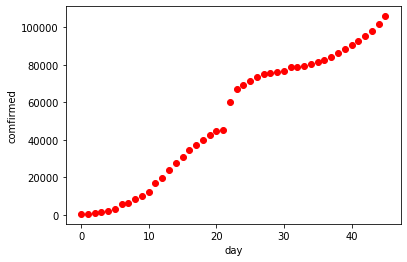

         date  people confirmed
0  01/22/2020             555.0
1  01/23/2020             653.0
2  01/24/2020             941.0
3  01/25/2020            1438.0
4  01/26/2020            2118.0
5  01/27/2020            2927.0
6  01/28/2020            5578.0
7  01/29/2020            6165.0
8  01/30/2020            8235.0
9  01/31/2020            9925.0


X shape: (46, 2) y shape: (46, 1)


(46, 2)

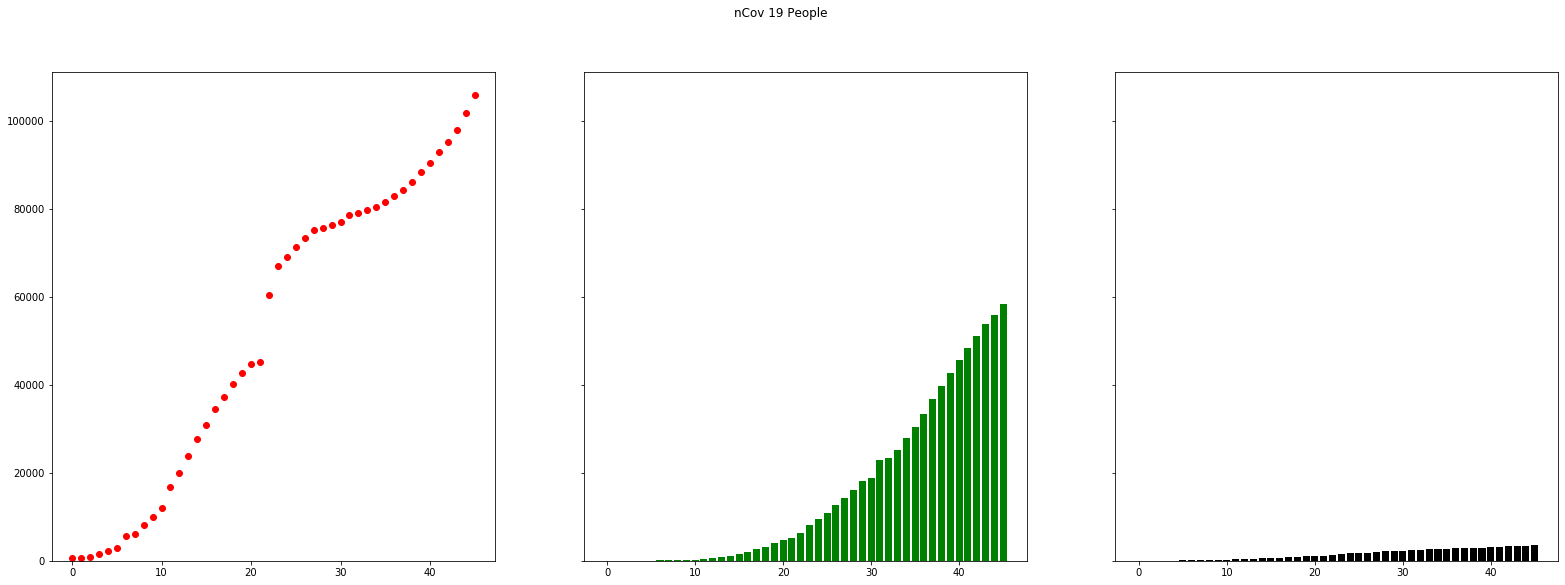

In [136]:
X_true, y_true= handle_data(data)
print("\n\nX shape:",X_true.shape,"y shape:",y_true.shape)
X= np.copy(X_true)
y= np.copy(y_true)
# model = LinearModel(X,y)  
X_true.shape

In [137]:
# train model
model.gradient_descend()  
model.weight

1835249837.1354268
Final loss is: 1835249837.1354268


array([[51797.04257933],
       [33785.76412525]])

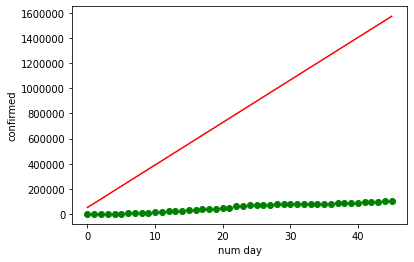

Ngày thứ 1
	Dữ liệu thật có:  653 ca nhiễm. Trung bình 1 ngày sẽ có 653
	Dự đoán sẽ có: -2918 ca nhiễm. Trung bình 1 ngày sẽ có -2918
Ngày thứ 2
	Dữ liệu thật có:  941 ca nhiễm. Trung bình 1 ngày sẽ có 470
	Dự đoán sẽ có: -373 ca nhiễm. Trung bình 1 ngày sẽ có -186
Ngày thứ 3
	Dữ liệu thật có:  1438 ca nhiễm. Trung bình 1 ngày sẽ có 479
	Dự đoán sẽ có: 2171 ca nhiễm. Trung bình 1 ngày sẽ có 723
Ngày thứ 4
	Dữ liệu thật có:  2118 ca nhiễm. Trung bình 1 ngày sẽ có 529
	Dự đoán sẽ có: 4716 ca nhiễm. Trung bình 1 ngày sẽ có 1179
Ngày thứ 5
	Dữ liệu thật có:  2927 ca nhiễm. Trung bình 1 ngày sẽ có 585
	Dự đoán sẽ có: 7261 ca nhiễm. Trung bình 1 ngày sẽ có 1452
Ngày thứ 6
	Dữ liệu thật có:  5578 ca nhiễm. Trung bình 1 ngày sẽ có 929
	Dự đoán sẽ có: 9806 ca nhiễm. Trung bình 1 ngày sẽ có 1634
Ngày thứ 7
	Dữ liệu thật có:  6165 ca nhiễm. Trung bình 1 ngày sẽ có 880
	Dự đoán sẽ có: 12351 ca nhiễm. Trung bình 1 ngày sẽ có 1764
Ngày thứ 8
	Dữ liệu thật có:  8235 ca nhiễm. Trung bình 1 ngày sẽ có 

In [133]:
# show
plt.scatter(X_true[:,1],y_true,c='g')
plt.plot(X_true[:,1],model.predict(),c='red')
plt.xlabel('num day')
plt.ylabel('confirmed') 
plt.show() 

DAY = 60
predict = []
for item in range(1,DAY):
    day = item
    day = [[1,item]]
    print('Ngày thứ',day[0][1])
    if item < 45:
        real = y_true[item][0]
        print('\tDữ liệu thật có: ',real, 'ca nhiễm. Trung bình 1 ngày sẽ có',int(real/item))
    pre = model.predict_by_day(day)
    predict.append(pre[0][0])
    print('\tDự đoán sẽ có:',int(model.predict_by_day(day)),'ca nhiễm. Trung bình 1 ngày sẽ có',int(pre/item))

Text(0.5, 0.98, 'nCov 19 People')

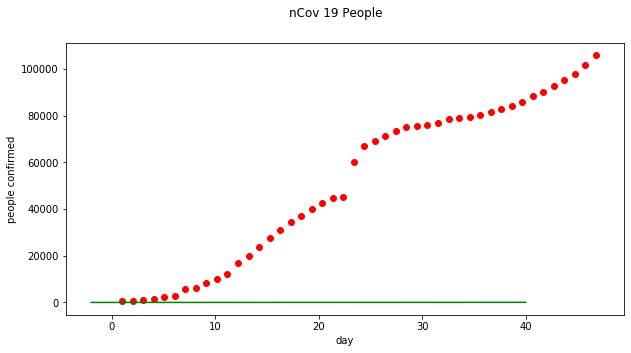

In [159]:
num_day = np.asarray(np.linspace(start=1,stop=DAY,num=DAY-1)) 
predict = np.array(predict) 
fig, axs = plt.subplots(1, figsize=(10,5), sharey=True) 
x = np.linspace(-2,40,10)
y = 1*x+0

axs.plot(x, y,color='green') 
axs.scatter(num_day[:46], y_true.T[0],color='r')  
axs.set_xlabel('day')
axs.set_ylabel('people confirmed')
fig.suptitle('nCov 19 People')

In [ ]:
Deep Learning => neural network, cnn, ... 
Machine Learning => neural network, ..
AI => rewards 
Reforcement Learning => rewards by time

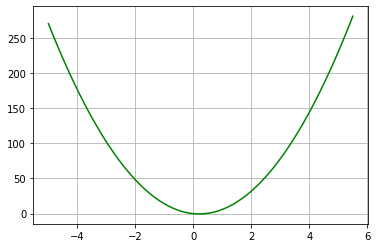

In [222]:
x = np.linspace(-5,5.5,102)
y = 10*x**2 -4*x 

plt.plot(x,y,'g')
plt.grid()
plt.show()